In [1]:
import pathlib
import pandas as pd
import anndata
import matplotlib.pyplot as plt
from scipy.sparse import vstack
from ALLCools.plot import *

In [2]:
total_obs = []
total_data = []
indexes = []
for path in pathlib.Path('../../../../data/Brain/snATAC-seq/5kb/').glob('*h5ad'):
    print(path)
    adata = anndata.read_h5ad(path)
    total_obs.append(adata.obs)
    total_data.append(adata.X)
    indexes += adata.var_names.tolist()

adata = anndata.AnnData(X=vstack(total_data).tocsr(),
                        obs=pd.concat(total_obs),
                        var=adata.var)


../../../../data/Brain/snATAC-seq/5kb/CEMBA190212_9H.5Kb_filtered.h5ad
../../../../data/Brain/snATAC-seq/5kb/CEMBA190212_9J.5Kb_filtered.h5ad
../../../../data/Brain/snATAC-seq/5kb/CEMBA190214_11E.5Kb_filtered.h5ad
../../../../data/Brain/snATAC-seq/5kb/CEMBA190214_11F.5Kb_filtered.h5ad
../../../../data/Brain/snATAC-seq/5kb/CEMBA190219_9H.5Kb_filtered.h5ad
../../../../data/Brain/snATAC-seq/5kb/CEMBA190219_9J.5Kb_filtered.h5ad
../../../../data/Brain/snATAC-seq/5kb/CEMBA190305_11E.5Kb_filtered.h5ad
../../../../data/Brain/snATAC-seq/5kb/CEMBA190305_11F.5Kb_filtered.h5ad
../../../../data/Brain/snATAC-seq/5kb/CEMBA190625_10E.5Kb_filtered.h5ad
../../../../data/Brain/snATAC-seq/5kb/CEMBA190625_10F.5Kb_filtered.h5ad
../../../../data/Brain/snATAC-seq/5kb/CEMBA190627_10E.5Kb_filtered.h5ad
../../../../data/Brain/snATAC-seq/5kb/CEMBA190627_10F.5Kb_filtered.h5ad
../../../../data/Brain/snATAC-seq/5kb/CEMBA190711_8E.5Kb_filtered.h5ad
../../../../data/Brain/snATAC-seq/5kb/CEMBA190711_8J.5Kb_filtered.h5a

In [3]:
adata

AnnData object with n_obs × n_vars = 161556 × 493653
    obs: 'barcode', 'CM', 'PE', 'PL', 'PP', 'SA', 'SE', 'TN', 'UM', 'UQ', 'US', 'cellID', 'L1cluster', 'L2cluster', 'L3cluster', 'sample', 'logUMI', 'L3umap1', 'L3umap2', 'L2umap1', 'L2umap2', 'L1umap1', 'L1umap2', 'L0umap1', 'L0umap2', 'tsse', 'DissectionRegion', 'replicate', 'Order', 'RegionName', 'MajorRegion', 'SubRegion', 'DetailRegion', 'PotentialOverlap', 'Slice', 'Anterior', 'Posterior', 'MajorRegionColor', 'SubRegionColor', 'DissectionRegionColor', 'L1Color', 'L2Color', 'L3Color', 'CellClass', 'MajorType', 'SubType', 'umap_0', 'umap_1', 'Region', 'PotentialOverlap (MMB)', 'Anterior (CCF coords)', 'Posterior (CCF coords)'
    var: 'chrom', 'start', 'end'

In [4]:
adata.obs.groupby('MajorType')['CellClass'].value_counts().unstack()

CellClass,GABA,Glutamate,NonN
MajorType,,,
GABA.CRc,638.0,NaN,NaN
GABA.Cnu,2.0,NaN,NaN
GABA.Foxp2,6.0,NaN,NaN
GABA.Hip,4132.0,NaN,NaN
GABA.Lamp5,1274.0,NaN,NaN
GABA.Lsx,66.0,NaN,NaN
GABA.Ms,195.0,NaN,NaN
GABA.MsnD2,3.0,NaN,NaN
GABA.OlfStr,75.0,NaN,NaN


In [5]:
not_use = [
    'Glutamate.L2HIP', 'Glutamate.NP', 'Glutamate.CT', 'GABA.Ms',
    'Glutamate.PT', 'Glutamate.L6b', 'GABA.OlfStr', 'GABA.Lsx', 'Glutamate.L5',
    'Glutamate.L23', 'Glutamate.OLF', 'Glutamate.L6', 'Glutamate.AON',
    'GABA.Foxp2', 'GABA.MsnD2', 'GABA.Cnu', 'Glutamate.CLA', 'Glutamate.L4'
]
adata = adata[~adata.obs['MajorType'].isin(not_use), :]

In [6]:
integration_group = {
    'GABA.CRc': 'Inh',
    'GABA.Cnu': 'Inh',
    'GABA.Foxp2': 'Inh',
    'GABA.Hip': 'Inh',
    'GABA.Lamp5': 'Inh',
    'GABA.Lsx': 'Inh',
    'GABA.Ms': 'Inh',
    'GABA.MsnD2': 'Inh',
    'GABA.OlfStr': 'Inh',
    'GABA.Pv': 'Inh',
    'GABA.Sst': 'Inh',
    'GABA.Vip': 'Inh',
    'Glutamate.AON': 'Exc',
    'Glutamate.CA1': 'Exc',
    'Glutamate.CA3': 'Exc',
    'Glutamate.CLA': 'Exc',
    'Glutamate.CT': 'Exc',
    'Glutamate.GC': 'DG',
    'Glutamate.L23': 'Exc',
    'Glutamate.L2HIP': 'Exc',
    'Glutamate.L4': 'Exc',
    'Glutamate.L5': 'Exc',
    'Glutamate.L6': 'Exc',
    'Glutamate.L6b': 'Exc',
    'Glutamate.NP': 'Exc',
    'Glutamate.OLF': 'Exc',
    'Glutamate.PT': 'Exc',
    'NonN.Asc': 'Glia',
    'NonN.Mgc': 'Glia',
    'NonN.Ogc': 'Glia',
    'NonN.Opc': 'Glia',
    'NonN.Per': 'Glia',
    'NonN.Rgl': 'Glia',
    'NonN.Vec': 'Glia',
    'NonN.Vlmc': 'Glia',
    'NonN.Vpia': 'Glia',
    'NonN.iOl': 'Glia'
}
major_group = {
    'Exc': 'Neuron',
    'Inh': 'Neuron',
    'Glia': 'Glia',
    'DG': 'DG',
}
adata.obs['IntegrationGroup'] = adata.obs['MajorType'].map(integration_group).map(major_group)

Trying to set attribute `.obs` of view, copying.


In [7]:
assert adata.obs['IntegrationGroup'].isna().sum() == 0

In [10]:
for group, cells in adata.obs.groupby('IntegrationGroup'):
    _adata = adata[cells.index, :].copy()
    _adata.write_h5ad(f'snATAC.5kb.{group}.h5ad')

... storing 'barcode' as categorical
... storing 'L2cluster' as categorical
... storing 'L3cluster' as categorical
... storing 'sample' as categorical
... storing 'DissectionRegion' as categorical
... storing 'RegionName' as categorical
... storing 'SubRegion' as categorical
... storing 'DetailRegion' as categorical
... storing 'PotentialOverlap' as categorical
... storing 'SubRegionColor' as categorical
... storing 'DissectionRegionColor' as categorical
... storing 'L2Color' as categorical
... storing 'L3Color' as categorical
... storing 'MajorType' as categorical
... storing 'SubType' as categorical
... storing 'Region' as categorical
... storing 'PotentialOverlap (MMB)' as categorical
... storing 'IntegrationGroup' as categorical
... storing 'barcode' as categorical
... storing 'L2cluster' as categorical
... storing 'L3cluster' as categorical
... storing 'sample' as categorical
... storing 'DissectionRegion' as categorical
... storing 'RegionName' as categorical
... storing 'SubRegi

In [8]:
_adata = adata[adata.obs['IntegrationGroup'] == 'Neuron', :]
_adata.obs = _adata.obs[['MajorType', 'SubType']]
_adata.var = _adata.var[[]]
_adata.write_h5ad(f'snATAC.5kb.Neuron.h5ad')
_adata

... storing 'MajorType' as categorical
... storing 'SubType' as categorical


AnnData object with n_obs × n_vars = 43361 × 493653
    obs: 'MajorType', 'SubType'

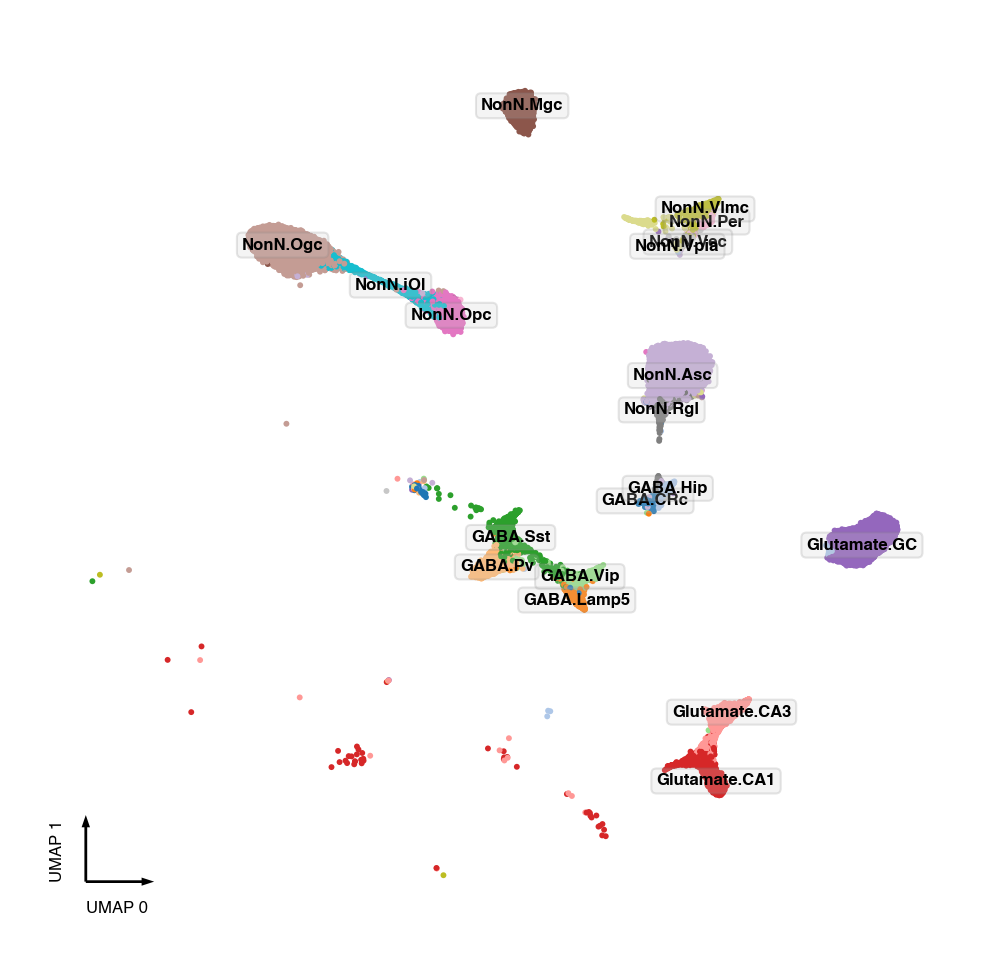

In [12]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)

_ = categorical_scatter(ax=ax,
                        data=adata.obs,
                        coord_base='umap',
                        hue='MajorType',
                        text_anno='MajorType',
                        s=2,
                        max_points=None)